In [1]:


from TRIOMA.tools.component_tools import Component
from TRIOMA.tools.component_tools import Fluid
from TRIOMA.tools.component_tools import Membrane, Geometry, Circuit,BreedingBlanket
import TRIOMA.tools.materials as materials

Let's define a Pipe component. A Component is made of a fluid class, flowing inside the pipe, and a membrane class, which is the pipe. To define a fluid class we can define all properties or use pre-built materials with the set_properties_from_fluid_material method (which takes as input a Fluid material class, here returned by the material.Flibe function).
Component specific properties of the fluid representation, such as Temperature, hydraulic diameter and fluid velocity, are not material independent, so they must be specified by the user. 

In [2]:
T=973.15
d_hyd=25.4E-3
U0=2.5
U0_PAV=0.9
flibe=Fluid(d_Hyd=d_hyd,U0=U0)
flibe.set_properties_from_fluid_material(materials.Flibe(T))
flibe_PAV=Fluid(d_Hyd=d_hyd,U0=U0_PAV)
flibe_PAV.set_properties_from_fluid_material(materials.Flibe(T))

With ease we can define a membrane, the solid material of the pipe. Geometric properties (not material-dependent) only include the thickness of the pipe. 

In [3]:
Steel_PAV = Membrane( thick=0.25E-3,k_r=1E9,k_d=1E9)
Steel_PAV.set_properties_from_solid_material(materials.Steel(T))
Steel = Membrane( thick=2.5E-3,k_r=1E9,k_d=1E9)
Steel.set_properties_from_solid_material(materials.Steel(T))

Now we define a component. It takes as input a fluid, a membrane and the inlet concentration of the component. The inlet concentration is not defined by the fluid class as some other components such as the Breeding Blanket may behave differently. The lenght is a characteristic of the component, but it can be evaluated with some component methods itself (e.g: heat exchangers), therefore it is used as argument of the methods which need it and is treated as an external variable (this may change)

In [4]:
PAV_geom=Geometry(L=10,D=25.4E-3, thick=2.5E-3, n_pipes=1E3)
connection_geom=Geometry(L=20,D=25.4E-3, thick=2.5E-3, n_pipes=1E3)
c_in=1E-3
PAV = Component(c_in=c_in, geometry=PAV_geom,fluid=flibe_PAV, membrane=Steel_PAV, name='PAV') 

Now we can use pre-built methods to evaluate the T extraction efficiency of the component and the outlet concentration.

In [5]:
PAV.get_efficiency(c_guess=c_in/1E3)
PAV.outlet_c_comp()

0.0008957843714986652

We can also inspect component variables. 

In [6]:
PAV.analytical_efficiency()
PAV.inspect("eff")
PAV.inspect("eff_an")
print("Relative efficiency error",abs(PAV.eff-PAV.eff_an)/PAV.eff)

eff: 0.1042156285013348
eff_an: 0.10416165961700474
Relative efficiency error 0.0005178578789587576


Or inspect the whole component together with the Fluid class and Membrane class by using the inspect method without an argument

c_in: 0.001
geometry is a <class 'TRIOMA.tools.component_tools.Geometry'> class, printing its variables:
    L: 10
    D: 0.0254
    thick: 0.0025
    n_pipes: 1000.0
    turbulator: None
eff: 0.1042156285013348
n_pipes: (1000.0,)
fluid is a <class 'TRIOMA.tools.component_tools.Fluid'> class, printing its variables:
    T: 973.15
    MS: True
    D_0: None
    E_d: None
    Solubility_0: None
    E_s: None
    D: 5.176263854774369e-09
    Solubility: 0.000454
    k_t: 6.389606338038667e-05
    d_Hyd: 0.0254
    mu: 0.005498297045533315
    rho: 1938.1028000000001
    recirculation: 0
    U0: 0.9
    k: 1.1
    cp: 2386
    h_coeff: None
    inv: None
membrane is a <class 'TRIOMA.tools.component_tools.Membrane'> class, printing its variables:
    T: 973.15
    D: 1.604499778787223e-10
    K_S: 1
    thick: 0.00025
    k_d: 1000000000.0
    k_r: 1000000000.0
    k: None
    D_0: None
    E_d: None
    K_S_0: None
    E_S: None
    inv: None
name: PAV
loss: False
inv: None
p_out: 1e-15
de

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_4088\2654637843.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


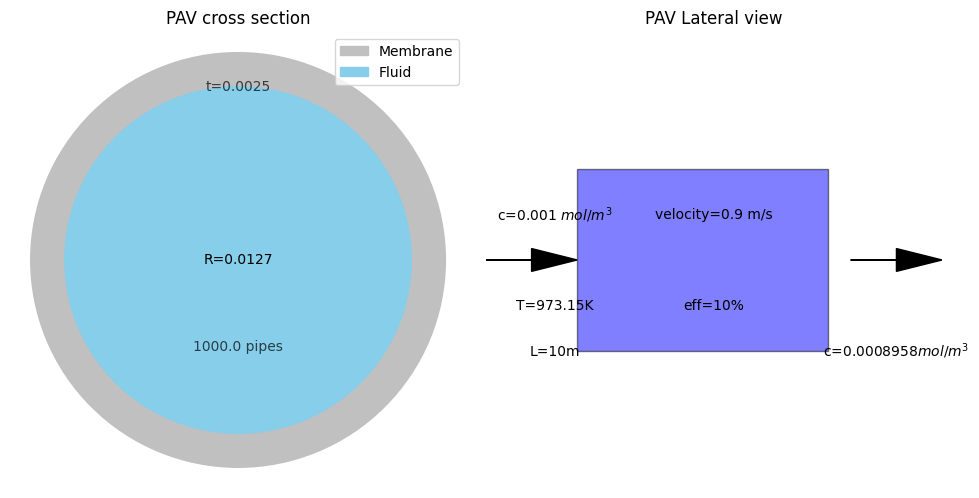

In [7]:
PAV.inspect()
fig=PAV.plot_component()
fig.show()

Extracted the 28.86726540046689% of the Tritium
Extracted the 71.13273459953311% of the Tritium


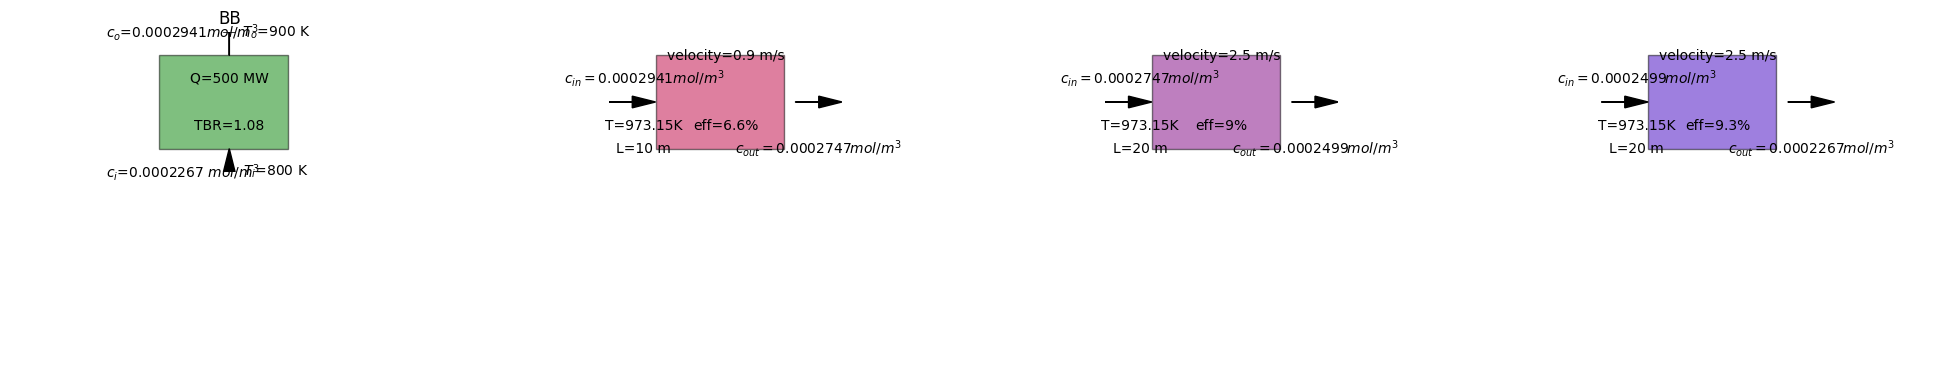

In [8]:
PAV.membrane.D=PAV.membrane.D*1E3
PAV.fluid.k_t=3.91E-5 ## COMSOL
PAV.fluid.D=PAV.fluid.D*1E2
Connection = Component(c_in=c_in, geometry=connection_geom,fluid=flibe, membrane=Steel, name='PAV2',loss=True) 
Connection2 = Component(c_in=c_in, geometry=connection_geom,fluid=flibe, membrane=Steel, name='PAV3',loss=True) 
BB=BreedingBlanket(Q=0.5E9,TBR=1.08,T_out=900,T_in=800,fluid=flibe, c_in=1E-10,name="BB" )
BB.get_flowrate()
Circuit1=Circuit(components=[BB,PAV,Connection,Connection2],closed=False)
Circuit1.solve_circuit()
# Circuit.inspect_circuit()
Circuit1.get_gains_and_losses()
print("Extracted the "+str(Circuit1.extraction_perc*100) +"% of the Tritium")
print("Extracted the "+str(Circuit1.loss_perc*100) +"% of the Tritium")
fig2=Circuit1.plot_circuit()


In [9]:
Circuit1.get_circuit_pumping_power()
print("The circuit requires "+str(Circuit1.pumping_power/1E3)+" kW of pumping power")

The circuit requires 316.84572652449725 kW of pumping power


In [10]:
Connection.inspect()    

c_in: 0.0002746529712873617
geometry is a <class 'TRIOMA.tools.component_tools.Geometry'> class, printing its variables:
    L: 20
    D: 0.0254
    thick: 0.0025
    n_pipes: 1000.0
    turbulator: None
eff: 0.08997327713145908
n_pipes: (1000.0,)
fluid is a <class 'TRIOMA.tools.component_tools.Fluid'> class, printing its variables:
    T: 973.15
    MS: True
    D_0: None
    E_d: None
    Solubility_0: None
    E_s: None
    D: 5.176263854774369e-09
    Solubility: 0.000454
    k_t: 0.00016239397747749114
    d_Hyd: 0.0254
    mu: 0.005498297045533315
    rho: 1938.1028000000001
    recirculation: 0
    U0: 2.5
    k: 1.1
    cp: 2386
    h_coeff: None
    inv: None
membrane is a <class 'TRIOMA.tools.component_tools.Membrane'> class, printing its variables:
    T: 973.15
    D: 1.604499778787223e-10
    K_S: 1
    thick: 0.0025
    k_d: 1000000000.0
    k_r: 1000000000.0
    k: None
    D_0: None
    E_d: None
    K_S_0: None
    E_S: None
    inv: None
name: PAV2
loss: True
inv: Non

In [11]:
import math
import numpy as np 
t_final=4E3 ## final simulation time
dt=0.5 ## time step for simulation
t=0 ## initial time
compute_inv=False ## boolean for inventory evaluation
rewrite_file=False ## boolean for rewriting the savefile


TRIOMA evaluates the steady state solution for components, and there is no transient formulation. The idea is that, because of Pé in the liquid is >>1, the information in the liquid travels at the velocity of the liquid. Therefore, if $c_{in}$ enters at time 0, $c_{out}$ evaluated with trioma exits at a timelag, which is the time for the fluid to travel through the pipe L/U0. Each of these delays sums up if components are connected in series.
 

In [12]:

delay_PAV=(PAV.geometry.L/PAV.fluid.U0) ## delay in the PAV,
delay_connection=(Connection.geometry.L/Connection.fluid.U0) ## delay due to the connection
delay_connection+=delay_PAV ## total delay in the connection
delay_connection2=(Connection2.geometry.L/Connection2.fluid.U0) ## delay due to the connection
delay_connection2+=delay_connection ## total delay in the connection
# delay_BB=319/1.28 ## delay in the BB
delay_BB=0
delay_BB+=delay_connection2 ## total delay in the BB
i=0
N=math.ceil(delay_BB/dt) # number of "timesteps" to reach the delay dime 


Then before having the information to travel in the whole circuit, the information must be retrieved somewhere. A very low initial concentration is defined and a vector for each component is defined to make it the inlet concentration for the first steps 

In [13]:

initial_value=1E-11
PAV.c_in=initial_value
BB.c_in=initial_value
Connection.c_in=initial_value
Connection2.c_in=initial_value
PAV_outlet_c= np.full(N, initial_value) ## initialising the arrays for the concentration in PAV, BB, Connection and Connection2
BB_outlet_c= np.full(N, initial_value)
PAV_eff=np.full(N, initial_value)
BB_Q= np.full(N, initial_value) ##initializing the Power density in the BB
BB_inlet_c= np.full(N, initial_value)
outlet_connection1= np.full(N, initial_value)
outlet_connection2= np.full(N, initial_value)
PAV_inv=np.full(N, initial_value)
connection_inv=np.full(N, initial_value)
connection2_inv=np.full(N, initial_value)


Then a time dependent function for the pulsed plasma operation is defined. 

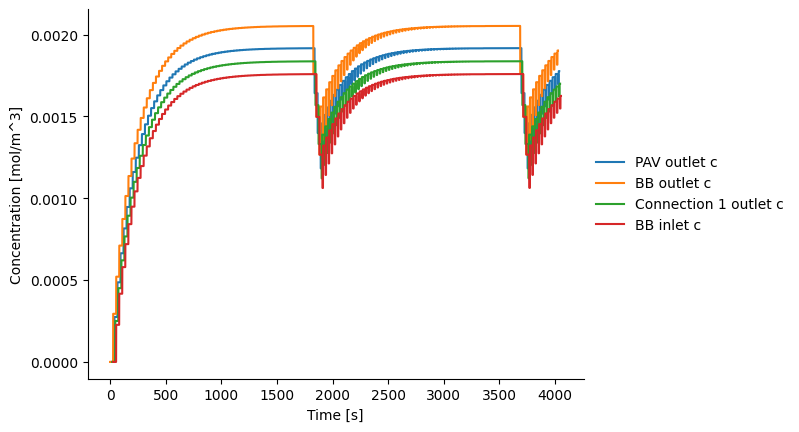

In [14]:
def lin_ramp_pulse(t):
    t_ramp=0
    t_pulse=1800
    t_down=60
    t_period=2*t_ramp+t_pulse+t_down
    if t%t_period<t_ramp:
        return (t%t_period)/t_ramp
    elif t%t_period<t_ramp+t_pulse:
        return 1
    elif t%t_period<2*t_ramp+t_pulse:
        return 1-((t%t_period-(t_ramp+t_pulse))/t_ramp)
    else:
        return 0
i=N
delay_ind_PAV=math.ceil(delay_PAV/dt)
delay_ind_connection=math.ceil(delay_connection/dt)
delay_ind_connection2=math.ceil(delay_connection2/dt)
delay_ind_BB=math.ceil(delay_BB/dt)
T_out_ss=BB.T_out
while t<t_final:
    BB.Q=0.5E9*lin_ramp_pulse(t)
    BB.get_cout()
    BB.T_out=BB.T_in+(BB.Q/BB.m_coolant/BB.fluid.cp)
    PAV.c_in=BB_outlet_c[i-delay_ind_BB]
    PAV.T=BB.T_out
    Connection.c_in=PAV_outlet_c[i-delay_ind_PAV]
    Connection2.c_in=outlet_connection1[i-delay_ind_connection]
    BB.c_in=outlet_connection2[i-delay_ind_connection2]
    Circuit1.solve_circuit()
    PAV_outlet_c=np.append(PAV_outlet_c,PAV.c_out)
    BB_outlet_c=np.append(BB_outlet_c,BB.c_out)
    outlet_connection1=np.append(outlet_connection1,Connection.c_out)
    outlet_connection2=np.append(outlet_connection2,Connection2.c_out)
    BB_inlet_c=np.append(BB_inlet_c,BB.c_in)
    BB_Q=np.append(BB_Q,BB.Q)
    PAV_eff=np.append(PAV_eff,PAV.eff)
    if compute_inv:
        PAV.get_inventory(flag_an=False)
        Connection.get_inventory(flag_an=False)
        Connection2.get_inventory(flag_an=False)
        PAV_inv=np.append(PAV_inv,PAV.inv)
        connection_inv=np.append(connection_inv,Connection.inv)
        connection2_inv=np.append(connection2_inv,Connection2.inv)
    
    # PAV_outlet_c.append(PAV.c_out)
    # BB_outlet_c.append(BB.c_out)
    # PAV_eff.append(PAV.eff)
    # BB_Q.append(BB.Q)
    # BB_inlet_c.append(BB.c_in)
    i+=1
    t+=dt
    
import matplotlib.pyplot as plt
t_final=t_final+delay_BB

t_vec=np.arange(-0,t_final,dt)
t_vec=t_vec
if len(t_vec)!=len(PAV_outlet_c):
    t_vec=np.append(t_vec,t_final+dt)

plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c")
plt.plot(t_vec,BB_outlet_c,label="BB outlet c")
plt.plot(t_vec+delay_connection,outlet_connection1,label="Connection 1 outlet c")
# plt.plot(t_vec+delay_ind_connection2,outlet_connection2,label="Connection 2 outlet c")
plt.plot(t_vec+delay_connection2,BB_inlet_c,label="BB inlet c")
# plt.yscale("log")
#put the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


Delay indices for each component are defined

In [15]:

# delay_ind_BB=math.ceil(delay_BB/dt)
# delay_ind_PAV=math.ceil(delay_PAV/dt)
# delay_ind_connection=math.ceil(delay_connection/dt)
# delay_ind_connection2=math.ceil(delay_connection2/dt)

# T_out_ss=BB.T_out


Then the simulation is run: each component is connected with the component simulated N timesteps before, depending on the timelag of the component. The tritium generation and outlet temperature in the blanket follows the pulsed operation. The circuit is defined as an open circuit therefore the solution is not the steady state solution. The circuit method solve_circuit is not suitable for this calculation as it would link the concentration of each compoenent at the simulation time, without accounting for the delay. 

In [16]:

# while t<t_final:
#     BB.Q=0.5E9*lin_ramp_pulse(t)
#     BB.get_cout()
#     BB.T_out=BB.T_in+(BB.Q/BB.m_coolant/BB.fluid.cp)
#     PAV.c_in=BB_outlet_c[i-delay_ind_BB]
#     PAV.T=BB.T_out
#     Connection.c_in=PAV_outlet_c[i-delay_ind_PAV]
#     Connection2.c_in=outlet_connection1[i-delay_ind_connection]
#     BB.c_in=outlet_connection2[i-delay_ind_connection2]
#     PAV.use_analytical_efficiency()
#     Connection.use_analytical_efficiency()
#     Connection2.use_analytical_efficiency()
#     # Circuit1.solve_circuit()
#     PAV.outlet_c_comp()
#     Connection.outlet_c_comp()
#     Connection2.outlet_c_comp()
#     BB.get_cout()
#     PAV_outlet_c=np.append(PAV_outlet_c,PAV.c_out)
#     BB_outlet_c=np.append(BB_outlet_c,BB.c_out)
#     outlet_connection1=np.append(outlet_connection1,Connection.c_out)
#     outlet_connection2=np.append(outlet_connection2,Connection2.c_out)
#     BB_inlet_c=np.append(BB_inlet_c,BB.c_in)
#     BB_Q=np.append(BB_Q,BB.Q)
#     PAV_eff=np.append(PAV_eff,PAV.eff)
#     if compute_inv:
#         PAV.get_inventory(flag_an=False)
#         Connection.get_inventory(flag_an=False)
#         Connection2.get_inventory(flag_an=False)
#         PAV_inv=np.append(PAV_inv,PAV.inv)
#         connection_inv=np.append(connection_inv,Connection.inv)
#         connection2_inv=np.append(connection2_inv,Connection2.inv)
    
#     # PAV_outlet_c.append(PAV.c_out)
#     # BB_outlet_c.append(BB.c_out)
#     # PAV_eff.append(PAV.eff)
#     # BB_Q.append(BB.Q)
#     # BB_inlet_c.append(BB.c_in)
#     i+=1
#     t+=dt
    
# import matplotlib.pyplot as plt
# t_final=t_final+delay_BB

# t_vec=np.arange(-0,t_final,dt)
# if len(t_vec)!=len(PAV_outlet_c):
#     t_vec=np.append(t_vec,t_final+dt)

# plt.plot(t_vec,PAV_outlet_c,label="PAV outlet c")
# plt.plot(t_vec,BB_outlet_c,label="BB outlet c")
# plt.plot(t_vec,outlet_connection1,label="Connection 1 outlet c")
# # plt.plot(t_vec+delay_ind_connection2,outlet_connection2,label="Connection 2 outlet c")
# plt.plot(t_vec,BB_inlet_c,label="BB inlet c")
# # plt.yscale("log")
# #put the legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
# plt.xlabel("Time [s]")
# plt.ylabel("Concentration [mol/m^3]")
# ## remove right and top spines
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)


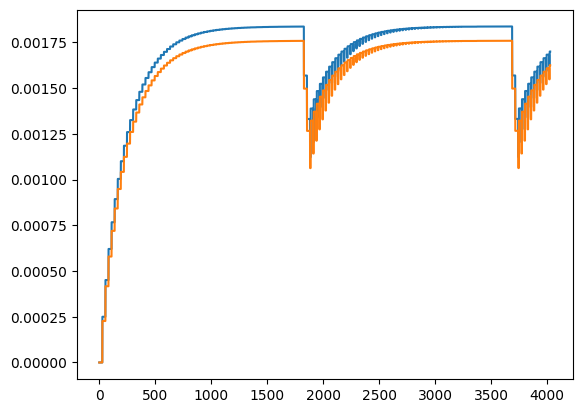

In [17]:
plt.plot(t_vec,outlet_connection1,label="Connection 1 outlet c")
plt.plot(t_vec,outlet_connection2,label="Connection 2 outlet c")

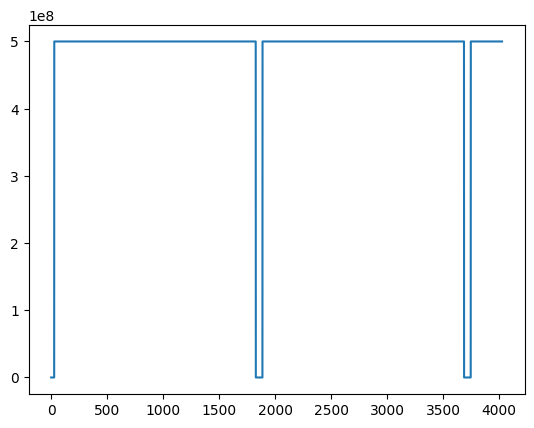

In [18]:
plt.plot(t_vec,BB_Q,label="BB Q")
plt.show()


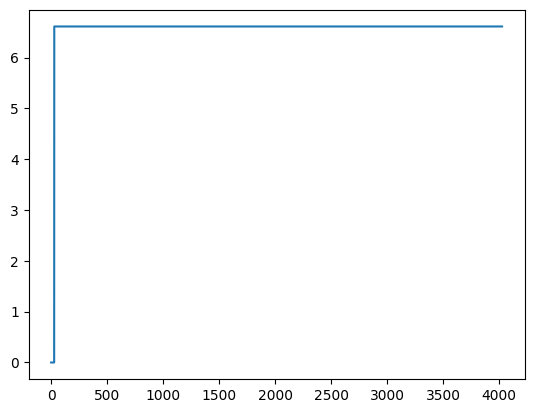

In [19]:
plt.plot(t_vec,PAV_eff*100,label="PAV eff")
# plt.ylim(0.10578,0.105781)

In [20]:
if compute_inv:    
    plt.plot(t_vec,PAV_inv,label="PAV inv")
    plt.plot(t_vec,connection_inv,label="Connection inv")
    plt.plot(t_vec,connection2_inv,label="Connection2 inv")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)

In [21]:

folder="COMSOL_comparison_transient"
## Save vectors as txt file in the folder
exp_c_in_PAV=np.column_stack((t_vec,BB_outlet_c))
if rewrite_file:
    np.savetxt(folder+"/c_in_PAV_vec.txt",exp_c_in_PAV)
exp_c_out_PAV=np.column_stack((t_vec,PAV_outlet_c))
if rewrite_file:
    np.savetxt(folder+"/c_out_PAV_vec.txt",exp_c_out_PAV)


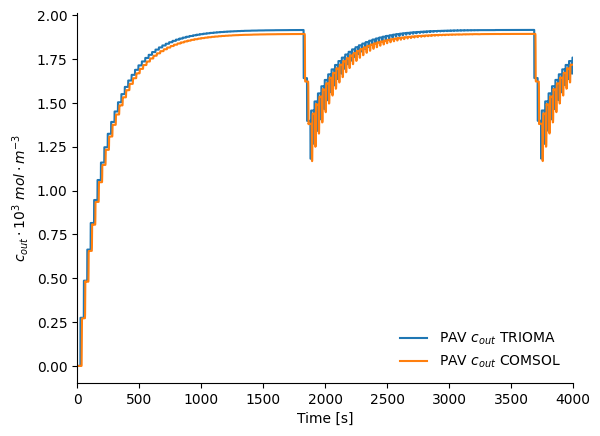

In [22]:
plt.plot(t_vec,PAV_outlet_c*1E3,label=r"PAV $c_{out}$ TRIOMA")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1]*1E3,label=r"PAV $c_{out}$ COMSOL")
plt.legend(loc='lower right',frameon=False)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel(r"$c_{out}\cdot 10^3$ $mol \cdot m^{-3}$")
plt.xlim(0,4000)
plt.savefig(folder+"/c_out_PAV_comparison.png",dpi=300)


Text(0, 0.5, '$c_{out}$ $mol \\cdot m^{-3}$')

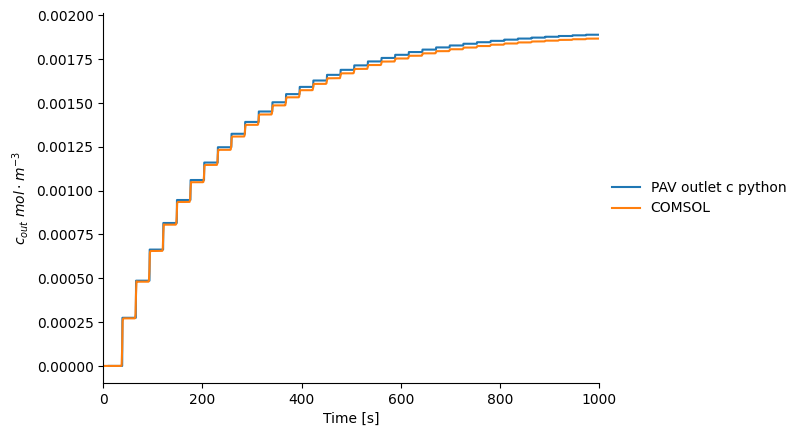

In [23]:
plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c python")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1],label="COMSOL")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.xlim(0,1000)
# plt.ylim(0.0007,0.0008)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel(r"$c_{out}$ $mol \cdot m^{-3}$")

Text(0, 0.5, 'Concentration [mol/m^3]')

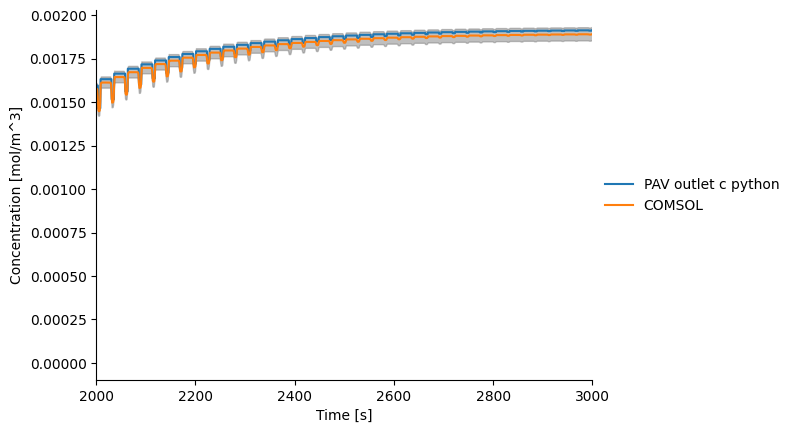

In [24]:
from turtle import color


plt.plot(t_vec+delay_PAV,PAV_outlet_c,label="PAV outlet c python")
PAV_cout_coms=np.loadtxt(folder+"/c_out_PAV_vec_COMS.txt", delimiter="\t")
plt.plot(PAV_cout_coms[:,0],PAV_cout_coms[:,1],label="COMSOL")
## plot a shadow band of 1% around the COMSOL data
plt.fill_between(PAV_cout_coms[:,0],PAV_cout_coms[:,1]*0.98,PAV_cout_coms[:,1]*1.02,alpha=0.5,color='gray')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.xlim(2E3,3000)
# plt.ylim(0.00011,0.00012)
## remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [mol/m^3]")

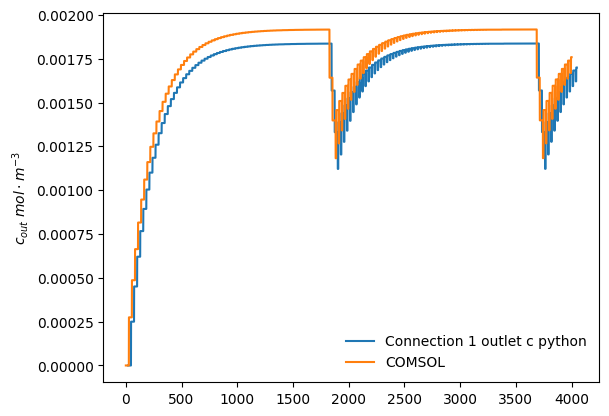

In [25]:
plt.plot(t_vec+delay_connection,outlet_connection1,label="Connection 1 outlet c python")
C1_cout_coms=np.loadtxt(folder+"/c_out_C1_vec_COMS_long.txt", delimiter="\t")
plt.plot(C1_cout_coms[:,0],C1_cout_coms[:,1],label="COMSOL")
plt.ylabel(r"$c_{out}$ $mol \cdot m^{-3}$")
plt.legend(loc='lower right',frameon=False)